In [1]:
import numpy as np
import pandas as pd
import warnings
import math
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/akankshitadash/Desktop/Programs/MA4199/Task 1/MachineLearning/Code/Replicate2/TE_chrE_filtered.txt',sep='\t')


In [3]:
df.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_001003803,ATP5S,1.771663,1.623404,1.465394,0.647103,1.930694,-0.148259,-0.306269,-1.124560,0.159031
1,NM_001003800,BICD2,-0.606712,-0.590100,-0.680005,-0.491531,0.363802,0.016612,-0.073293,0.115181,0.970514
2,NM_016640,MRPS30,0.655493,0.615126,0.244848,0.162678,0.974128,-0.040367,-0.410645,-0.492815,0.318635
3,NM_001304467,EEF1AKMT2,0.139172,0.507027,0.150521,-0.456894,1.292490,0.367854,0.011348,-0.596067,1.153317
4,NM_001080825,TMEM120B,0.902133,1.213467,0.150521,0.884143,2.177961,0.311334,-0.751612,-0.017991,1.275828


In [4]:
df.keys()

Index(['AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'],
      dtype='object')

In [5]:
df.shape

(6175, 11)

/Users/akankshitadash/Desktop/Bayesian Networks/TE+log2foldTE/6/AccNum1.txt
2124 2124
/Users/akankshitadash/Desktop/Bayesian Networks/TE+log2foldTE/6/AccNum2.txt
1091 1091
/Users/akankshitadash/Desktop/Bayesian Networks/TE+log2foldTE/6/AccNum3.txt
697 697
/Users/akankshitadash/Desktop/Bayesian Networks/TE+log2foldTE/6/AccNum4.txt
692 692
/Users/akankshitadash/Desktop/Bayesian Networks/TE+log2foldTE/6/AccNum5.txt
655 655
/Users/akankshitadash/Desktop/Bayesian Networks/TE+log2foldTE/6/AccNum6.txt
916 916
[2124, 1091, 697, 692, 655, 916]
[2124, 3215, 3912, 4604, 5259, 6175]


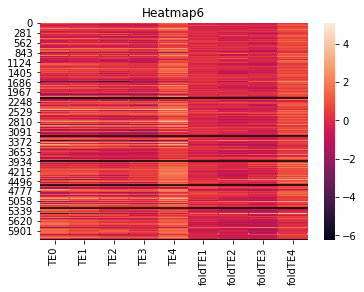

In [9]:
path_beginning =  '/Users/akankshitadash/Desktop/Bayesian Networks/TE+log2foldTE/'
num = ['4','5','6']
for i in num: #cluster number
    path = path_beginning+i+'/'
    clusters = [[] for i in range(int(i))]
    indices = []
    for j in range(int(i)): #sub-cluster within clusters
        path_load=path+'AccNum'+str(j+1)+'.txt'
        print(path_load)
        f = open(path_load, "r")
        idx=0
        for x in f:
            if(not df.loc[df['AccNum'] == x[:-1]].empty):
                idx+=1
                list_new = df.loc[df['AccNum'] == x[:-1]][['TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4']].values[0]
                clusters[int(j)-int(i)].append(list_new)
        indices.append(len(clusters[int(j)-int(i)]))
        print(len(clusters[int(j)-int(i)]),idx)     
    print(indices)
    for j in range(1,int(i)):
        indices[j]+=indices[j-1]
    print(indices)
    stacked = []
    for cluster in clusters:
        for row in cluster:
            stacked.append(row)

    ax = sns.heatmap(stacked,xticklabels=['TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'])
    ax.hlines(indices, *ax.get_xlim())
    plt.title('Heatmap'+str(i))
    plt.savefig(path_beginning+'Heatmap'+str(i)+'.png')
    plt.show()

In [ ]:
# print(indices)

In [ ]:
# for i in range(1,int(i)):
#     indices[i]+=indices[i-1]

In [ ]:
# print(indices)

In [ ]:
# stacked = []
# for cluster in clusters:
#     for row in cluster:
#         stacked.append(row)

# ax = sns.heatmap(stacked,xticklabels=['foldTE1',
#        'foldTE2', 'foldTE3', 'foldTE4'])
# ax.hlines(indices, *ax.get_xlim())
# plt.savefig('/Users/akankshitadash/Desktop/Mock/Heatmap'+str(i)+'.png')
# plt.show()

In [ ]:
# def plot_heatmap(X,idx,indices,path):
#     ax = sns.heatmap(X,xticklabels=['TE0','TE1', 'TE2', 'TE3','TE4'])
#     plt.title('Heatmap'+str(idx))
#     ax.hlines(indices, *ax.get_xlim())
#     plt.savefig(path)
#     plt.show()
    
# for idx,cluster in enumerate(clusters):
#     path = '/Users/akankshitadash/Desktop/Bayesian Networks/TE_chrE/4/'+str(idx+4)
#     plot_heatmap(cluster,idx+4,indices[idx],path)